## Importing packages:

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA

In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [46]:
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as multi

In [3]:
df = pd.read_excel(r'C:\Users\harka\BAN 5763 homework 2\Data_Exercise 2_BAN5763.xls',header=0)

In [4]:
df.head()

,ID,CELL,GENDER,ADTYPE,INFORM,BELIEVE
0,1,1,M,H,8,6
1,2,1,M,H,8,7
2,3,1,M,H,10,9
3,4,1,M,H,8,7
4,5,1,M,H,10,9


In [5]:
df.ADTYPE.value_counts()

E    12
C    12
H    12
Name: ADTYPE, dtype: int64

In [6]:
df.CELL.value_counts()

6    6
5    6
4    6
3    6
2    6
1    6
Name: CELL, dtype: int64

In [51]:
df.GENDER.value_counts()

F    18
M    18
Name: GENDER, dtype: int64

## Bar plot of dependent continuous variables

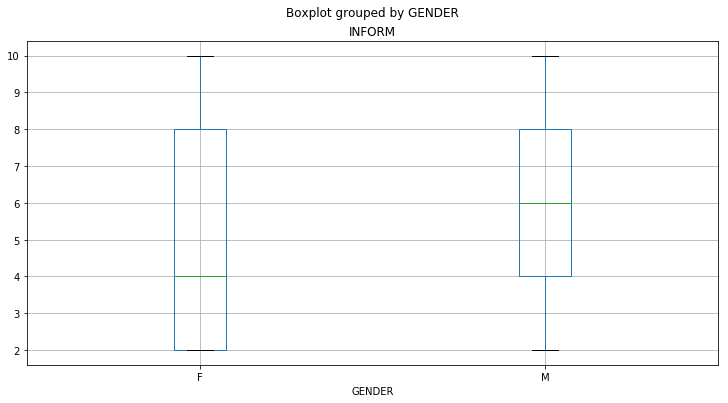

In [7]:
df.boxplot(column='INFORM',by='GENDER',figsize=(12,6))

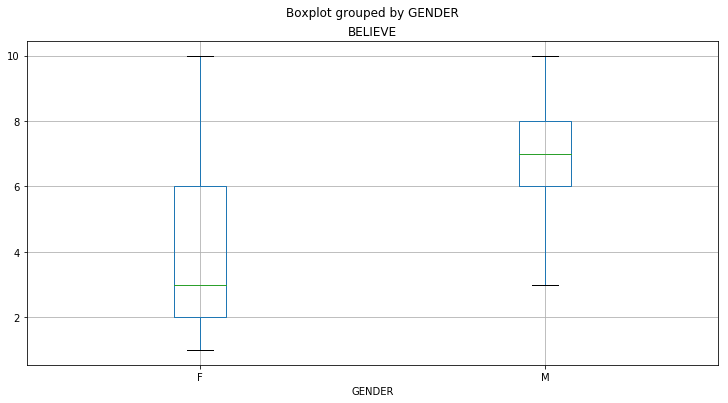

In [8]:
df.boxplot(column='BELIEVE',by='GENDER',figsize=(12,6))

## One way ANOVA test for testing effect of gender on inform & believe

In [27]:
f_gen_inf = stats.f_oneway(manova_data['INFORM'][manova_data['GENDER'] == 'M'],
               manova_data['INFORM'][manova_data['GENDER'] == 'F'])
f_gen_bel = stats.f_oneway(manova_data['BELIEVE'][manova_data['GENDER'] == 'M'],
               manova_data['BELIEVE'][manova_data['GENDER'] == 'F'])

print('Effect of gender on inform')
print(f_gen_inf)
print('Effect of gender on believe')
print(f_gen_bel)

Effect of gender on inform
F_onewayResult(statistic=0.994942196531792, pvalue=0.32558382971298794)
Effect of gender on believe
F_onewayResult(statistic=10.858456821665817, pvalue=0.0023055812709425628)


## One way ANOVA for testing effect of adtype on inform & believe

In [28]:
f_adt_inf = stats.f_oneway(manova_data['INFORM'][manova_data['ADTYPE'] == 'C'],
                           manova_data['INFORM'][manova_data['ADTYPE'] == 'H'],
                           manova_data['INFORM'][manova_data['ADTYPE'] == 'E'])

f_adt_bel = stats.f_oneway(manova_data['BELIEVE'][manova_data['ADTYPE'] == 'C'],
                           manova_data['BELIEVE'][manova_data['ADTYPE'] == 'H'],
                           manova_data['BELIEVE'][manova_data['ADTYPE'] == 'E'])

print('Effect of adtype on inform')
print(f_adt_inf)
print('Effect of adtype on believe')
print(f_adt_bel)

Effect of adtype on inform
F_onewayResult(statistic=1.1259842519685037, pvalue=0.33647619672597284)
Effect of adtype on believe
F_onewayResult(statistic=9.041366906474815, pvalue=0.000739531773864435)


## MANOVA on all dependent and independent variables

In [9]:
maov = MANOVA.from_formula('INFORM + BELIEVE ~ GENDER + ADTYPE + GENDER:ADTYPE',data = df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0661 2.0000 29.0000 204.8630 0.0000
         Pillai's trace  0.9339 2.0000 29.0000 204.8630 0.0000
 Hotelling-Lawley trace 14.1285 2.0000 29.0000 204.8630 0.0000
    Roy's greatest root 14.1285 2.0000 29.0000 204.8630 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          GENDER         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.1226 2.0000 29.0000 103.7714 0.0000
          Pillai's trace 0.8774 2.0000 29.0000 103.7714 0.0000
  Hotelling

## 2-way ANOVA on INFORM

In [45]:
formula = 'INFORM ~ GENDER + ADTYPE + GENDER:ADTYPE'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                 sum_sq    df         F  PR(>F)
GENDER           9.0000   1.0    7.7885  0.0091
ADTYPE          20.2222   2.0    8.7500  0.0010
GENDER:ADTYPE  252.6667   2.0  109.3269  0.0000
Residual        34.6667  30.0       NaN     NaN


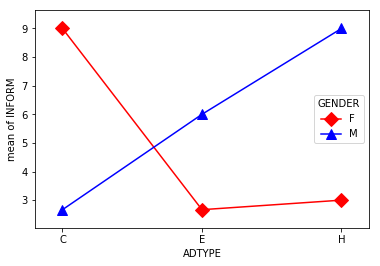

In [35]:
int_plot_inform = interaction_plot(df.ADTYPE,df.GENDER,df.INFORM,colors=['red','blue'],markers=['D','^'],ms=10)

## 2-way ANOVA on BELIEVE

In [44]:
formula2 = 'BELIEVE ~ GENDER + ADTYPE + GENDER:ADTYPE'
model2 = ols(formula2,df).fit()
aov_believe = anova_lm(model2,typ=2)
print(aov_believe.round(4))

                 sum_sq    df        F  PR(>F)
GENDER          69.4444   1.0  34.1530  0.0000
ADTYPE         101.5556   2.0  24.9727  0.0000
GENDER:ADTYPE   54.8889   2.0  13.4973  0.0001
Residual        61.0000  30.0      NaN     NaN


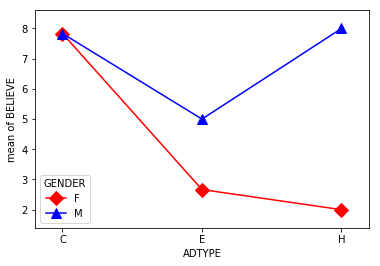

In [38]:
int_believe = interaction_plot(df.ADTYPE,df.GENDER,df.BELIEVE,colors=['red','blue'],markers=['D','^'],ms=10)

## Post hoc testing

In [49]:
mc = multi.MultiComparison(df.INFORM,groups=df.CELL)
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2      -3.0   -4.8877 -1.1123  True 
  1      3    -6.3333   -8.221 -4.4457  True 
  1      4      -6.0   -7.8877 -4.1123  True 
  1      5    -6.3333   -8.221 -4.4457  True 
  1      6      0.0    -1.8877  1.8877 False 
  2      3    -3.3333   -5.221 -1.4457  True 
  2      4      -3.0   -4.8877 -1.1123  True 
  2      5    -3.3333   -5.221 -1.4457  True 
  2      6      3.0     1.1123  4.8877  True 
  3      4     0.3333  -1.5543  2.221  False 
  3      5      0.0    -1.8877  1.8877 False 
  3      6     6.3333   4.4457  8.221   True 
  4      5    -0.3333   -2.221  1.5543 False 
  4      6      6.0     4.1123  7.8877  True 
  5      6     6.3333   4.4457  8.221   True 
---------------------------------------------


In [50]:
mc = multi.MultiComparison(df.BELIEVE,groups=df.CELL)
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2      -3.0    -5.504  -0.496  True 
  1      3    -0.1667  -2.6707  2.3373 False 
  1      4      -6.0    -8.504  -3.496  True 
  1      5    -5.3333  -7.8373 -2.8293  True 
  1      6    -0.1667  -2.6707  2.3373 False 
  2      3     2.8333   0.3293  5.3373  True 
  2      4      -3.0    -5.504  -0.496  True 
  2      5    -2.3333  -4.8373  0.1707 False 
  2      6     2.8333   0.3293  5.3373  True 
  3      4    -5.8333  -8.3373 -3.3293  True 
  3      5    -5.1667  -7.6707 -2.6627  True 
  3      6      0.0     -2.504  2.504  False 
  4      5     0.6667  -1.8373  3.1707 False 
  4      6     5.8333   3.3293  8.3373  True 
  5      6     5.1667   2.6627  7.6707  True 
---------------------------------------------
